# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.6.0-epsilon.new.72.fix.120.155.157.163.164.165'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

185

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Set phases with S-R trend analysis
analyser.trend(min_len=9)
# The number of countries
len(analyser.countries)

6

In [8]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{9: ['Senegal', 'Iran', 'Poland', 'Romania', 'United Arab Emirates', 'Guinea']}

In [9]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country              Phase                                        
Senegal              1st    Past  29Apr2020  10May2020    15854360
                     2nd    Past  11May2020  20May2020    15854360
                     3rd    Past  21May2020  30May2020    15854360
                     4th    Past  31May2020  08Jun2020    15854360
                     5th    Past  09Jun2020  16Jun2020    15854360
                     6th    Past  17Jun2020  25Jun2020    15854360
                     7th    Past  26Jun2020  10Jul2020    15854360
                     8th    Past  11Jul2020  22Jul2020    15854360
                     9th    Past  23Jul2020  03Aug2020    15854360
Iran                 1st    Past  28Mar2020  13Apr2020    81800269
                     2nd    Past  14Apr2020  06May2020    81800269
                     3rd    Past  07May2020  21May2020    81800269
                     4th    Past  22May2020  03Jun2020    81800269
                     5th    Past  04Jun2020  15Jun2020    81800269
                     6th    Past  16Jun2020  27Jun2020    81800269
                     7th    Past  28Jun2020  09Jul2020    81800269
                     8th    Past  10Jul2020  21Jul2020    81800269
                     9th    Past  22Jul2020  03Aug2020    81800269
Poland               1st    Past  23Apr2020  05May2020    37974750
                     2nd    Past  06May2020  17May2020    37974750
                     3rd    Past  18May2020  25May2020    37974750
                     4th    Past  26May2020  05Jun2020    37974750
                     5th    Past  06Jun2020  15Jun2020    37974750
                     6th    Past  16Jun2020  28Jun2020    37974750
                     7th    Past  29Jun2020  10Jul2020    37974750
                     8th    Past  11Jul2020  19Jul2020    37974750
                     9th    Past  20Jul2020  03Aug2020    37974750
Romania              1st    Past  15Apr2020  25Apr2020    19466145
                     2nd    Past  26Apr2020  06May2020    19466145
                     3rd    Past  07May2020  17May2020    19466145
                     4th    Past  18May2020  03Jun2020    19466145
                     5th    Past  04Jun2020  18Jun2020    19466145
                     6th    Past  19Jun2020  29Jun2020    19466145
                     7th    Past  30Jun2020  07Jul2020    19466145
                     8th    Past  08Jul2020  16Jul2020    19466145
                     9th    Past  17Jul2020  03Aug2020    19466145
United Arab Emirates 1st    Past  28Apr2020  12May2020     9630959
                     2nd    Past  13May2020  25May2020     9630959
                     3rd    Past  26May2020  02Jun2020     9630959
                     4th    Past  03Jun2020  10Jun2020     9630959
                     5th    Past  11Jun2020  21Jun2020     9630959
                     6th    Past  22Jun2020  01Jul2020     9630959
                     7th    Past  02Jul2020  09Jul2020     9630959
                     8th    Past  10Jul2020  21Jul2020     9630959
                     9th    Past  22Jul2020  03Aug2020     9630959
Guinea               1st    Past  01May2020  11May2020    12414318
                     2nd    Past  12May2020  19May2020    12414318
                     3rd    Past  20May2020  27May2020    12414318
                     4th    Past  28May2020  07Jun2020    12414318
                     5th    Past  08Jun2020  17Jun2020    12414318
                     6th    Past  18Jun2020  01Jul2020    12414318
                     7th    Past  02Jul2020  13Jul2020    12414318
                     8th    Past  14Jul2020  22Jul2020    12414318
                     9th    Past  23Jul2020  03Aug2020    12414318

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [10]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


--------------------Senegal--------------------


<Main scenario: parameter estimation>

Running optimization with 4 CPUs...

	2nd phase with SIR-F model: finished 789 trials in 0 min 55 sec

	1st phase with SIR-F model: finished 875 trials in 1 min 0 sec

	3rd phase with SIR-F model: finished 847 trials in 1 min 0 sec

	4th phase with SIR-F model: finished 863 trials in 1 min 0 sec

	5th phase with SIR-F model: finished 877 trials in 1 min 0 sec

	7th phase with SIR-F model: finished 849 trials in 1 min 0 sec

	6th phase with SIR-F model: finished 873 trials in 1 min 1 sec

	8th phase with SIR-F model: finished 881 trials in 1 min 0 sec

	9th phase with SIR-F model: finished 514 trials in 0 min 20 sec

Completed optimization. Total: 2 min 17 sec


--------------------Iran--------------------


<Main scenario: parameter estimation>

Running optimization with 4 CPUs...

	2nd phase with SIR-F model: finished 197 trials in 0 min 10 sec

	5th phase with SIR-F model: finished 230 trials in 0 min 10 sec

	3rd phase with SIR-F model: finished 503 trials in 0 min 25 sec

	7th phase with SIR-F model: finished 468 trials in 0 min 25 sec

	8th phase with SIR-F model: finished 67 trials in 0 min 5 sec

	1st phase with SIR-F model: finished 1002 trials in 1 min 0 sec

	4th phase with SIR-F model: finished 981 trials in 1 min 0 sec

	6th phase with SIR-F model: finished 1003 trials in 1 min 0 sec

	9th phase with SIR-F model: finished 541 trials in 0 min 30 sec

Completed optimization. Total: 1 min 28 sec


--------------------Poland--------------------


<Main scenario: parameter estimation>

Running optimization with 4 CPUs...

	3rd phase with SIR-F model: finished 232 trials in 0 min 15 sec

	1st phase with SIR-F model: finished 383 trials in 0 min 25 sec

	2nd phase with SIR-F model: finished 380 trials in 0 min 25 sec

	5th phase with SIR-F model: finished 395 trials in 0 min 25 sec

	8th phase with SIR-F model: finished 172 trials in 0 min 10 sec

	4th phase with SIR-F model: finished 806 trials in 0 min 55 sec

	7th phase with SIR-F model: finished 631 trials in 0 min 40 sec

	9th phase with SIR-F model: finished 346 trials in 0 min 20 sec

	6th phase with SIR-F model: finished 987 trials in 1 min 0 sec

Completed optimization. Total: 1 min 27 sec


--------------------Romania--------------------


<Main scenario: parameter estimation>

Running optimization with 4 CPUs...

	4th phase with SIR-F model: finished 163 trials in 0 min 10 sec

	3rd phase with SIR-F model: finished 232 trials in 0 min 15 sec

	2nd phase with SIR-F model: finished 301 trials in 0 min 20 sec

	6th phase with SIR-F model: finished 165 trials in 0 min 10 sec

	8th phase with SIR-F model: finished 240 trials in 0 min 15 sec

	1st phase with SIR-F model: finished 713 trials in 0 min 50 sec

	7th phase with SIR-F model: finished 456 trials in 0 min 30 sec

	5th phase with SIR-F model: finished 860 trials in 1 min 0 sec

	9th phase with SIR-F model: finished 1191 trials in 1 min 0 sec

Completed optimization. Total: 1 min 43 sec


--------------------United Arab Emirates--------------------


<Main scenario: parameter estimation>

Running optimization with 4 CPUs...

	2nd phase with SIR-F model: finished 821 trials in 1 min 0 sec

	1st phase with SIR-F model: finished 835 trials in 1 min 0 sec

	3rd phase with SIR-F model: finished 851 trials in 1 min 0 sec

	4th phase with SIR-F model: finished 858 trials in 1 min 0 sec

	8th phase with SIR-F model: finished 253 trials in 0 min 15 sec

	5th phase with SIR-F model: finished 980 trials in 1 min 0 sec

	6th phase with SIR-F model: finished 963 trials in 1 min 0 sec

	7th phase with SIR-F model: finished 961 trials in 1 min 0 sec

	9th phase with SIR-F model: finished 955 trials in 0 min 55 sec

Completed optimization. Total: 2 min 14 sec


--------------------Guinea--------------------


<Main scenario: parameter estimation>

Running optimization with 4 CPUs...

	1st phase with SIR-F model: finished 799 trials in 1 min 0 sec

	2nd phase with SIR-F model: finished 833 trials in 1 min 0 sec

	3rd phase with SIR-F model: finished 830 trials in 1 min 0 sec

	4th phase with SIR-F model: finished 851 trials in 1 min 0 sec

	5th phase with SIR-F model: finished 886 trials in 1 min 0 sec

	6th phase with SIR-F model: finished 850 trials in 1 min 0 sec

	7th phase with SIR-F model: finished 887 trials in 1 min 0 sec

	8th phase with SIR-F model: finished 889 trials in 1 min 0 sec

	9th phase with SIR-F model: finished 1421 trials in 1 min 0 sec

Completed optimization. Total: 3 min 3 sec

In [11]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE  \
Country              Phase                                                  
Senegal              1st    Past  29Apr2020  10May2020    15854360  SIR-F   
                     2nd    Past  11May2020  20May2020    15854360  SIR-F   
                     3rd    Past  21May2020  30May2020    15854360  SIR-F   
                     4th    Past  31May2020  08Jun2020    15854360  SIR-F   
                     5th    Past  09Jun2020  16Jun2020    15854360  SIR-F   
                     6th    Past  17Jun2020  25Jun2020    15854360  SIR-F   
                     7th    Past  26Jun2020  10Jul2020    15854360  SIR-F   
                     8th    Past  11Jul2020  22Jul2020    15854360  SIR-F   
                     9th    Past  23Jul2020  03Aug2020    15854360  SIR-F   
Iran                 1st    Past  28Mar2020  13Apr2020    81800269  SIR-F   
                     2nd    Past  14Apr2020  06May2020    81800269  SIR-F   
                     3rd    Past  07May2020  21May2020    81800269  SIR-F   
                     4th    Past  22May2020  03Jun2020    81800269  SIR-F   
                     5th    Past  04Jun2020  15Jun2020    81800269  SIR-F   
                     6th    Past  16Jun2020  27Jun2020    81800269  SIR-F   
                     7th    Past  28Jun2020  09Jul2020    81800269  SIR-F   
                     8th    Past  10Jul2020  21Jul2020    81800269  SIR-F   
                     9th    Past  22Jul2020  03Aug2020    81800269  SIR-F   
Poland               1st    Past  23Apr2020  05May2020    37974750  SIR-F   
                     2nd    Past  06May2020  17May2020    37974750  SIR-F   
                     3rd    Past  18May2020  25May2020    37974750  SIR-F   
                     4th    Past  26May2020  05Jun2020    37974750  SIR-F   
                     5th    Past  06Jun2020  15Jun2020    37974750  SIR-F   
                     6th    Past  16Jun2020  28Jun2020    37974750  SIR-F   
                     7th    Past  29Jun2020  10Jul2020    37974750  SIR-F   
                     8th    Past  11Jul2020  19Jul2020    37974750  SIR-F   
                     9th    Past  20Jul2020  03Aug2020    37974750  SIR-F   
Romania              1st    Past  15Apr2020  25Apr2020    19466145  SIR-F   
                     2nd    Past  26Apr2020  06May2020    19466145  SIR-F   
                     3rd    Past  07May2020  17May2020    19466145  SIR-F   
                     4th    Past  18May2020  03Jun2020    19466145  SIR-F   
                     5th    Past  04Jun2020  18Jun2020    19466145  SIR-F   
                     6th    Past  19Jun2020  29Jun2020    19466145  SIR-F   
                     7th    Past  30Jun2020  07Jul2020    19466145  SIR-F   
                     8th    Past  08Jul2020  16Jul2020    19466145  SIR-F   
                     9th    Past  17Jul2020  03Aug2020    19466145  SIR-F   
United Arab Emirates 1st    Past  28Apr2020  12May2020     9630959  SIR-F   
                     2nd    Past  13May2020  25May2020     9630959  SIR-F   
                     3rd    Past  26May2020  02Jun2020     9630959  SIR-F   
                     4th    Past  03Jun2020  10Jun2020     9630959  SIR-F   
                     5th    Past  11Jun2020  21Jun2020     9630959  SIR-F   
                     6th    Past  22Jun2020  01Jul2020     9630959  SIR-F   
                     7th    Past  02Jul2020  09Jul2020     9630959  SIR-F   
                     8th    Past  10Jul2020  21Jul2020     9630959  SIR-F   
                     9th    Past  22Jul2020  03Aug2020     9630959  SIR-F   
Guinea               1st    Past  01May2020  11May2020    12414318  SIR-F   
                     2nd    Past  12May2020  19May2020    12414318  SIR-F   
                     3rd    Past  20May2020  27May2020    12414318  SIR-F   
                     4th    Past  28May2020  07Jun2020    12414318  SIR-F   
                     5th    Past  08Jun2020  17Jun2020    12414318  SIR-F   
                     6th

## Compare the history of parameters
Here, compare the history of parameter values if countries.

### $Rt$: Reprodcution number $\mathrm{[-]}$

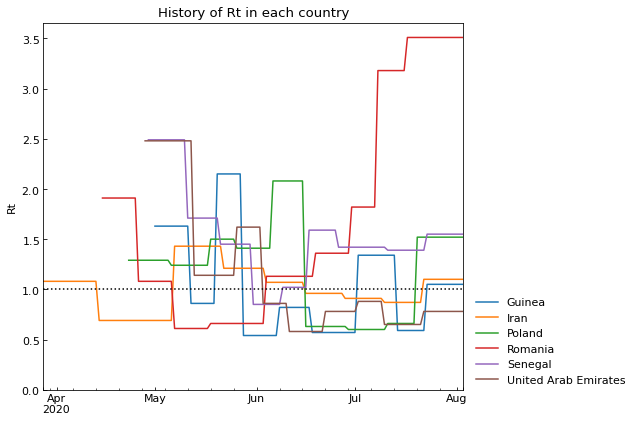

Country,Guinea,Iran,Poland,Romania,Senegal,United Arab Emirates
Date,,,,,,
2020-07-30,1.05,1.1,1.52,3.51,1.55,0.78
2020-07-31,1.05,1.1,1.52,3.51,1.55,0.78
2020-08-01,1.05,1.1,1.52,3.51,1.55,0.78
2020-08-02,1.05,1.1,1.52,3.51,1.55,0.78
2020-08-03,1.05,1.1,1.52,3.51,1.55,0.78


In [12]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

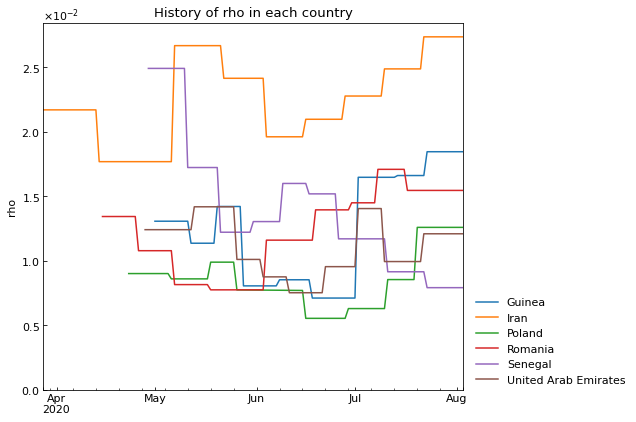

Country,Guinea,Iran,Poland,Romania,Senegal,United Arab Emirates
Date,,,,,,
2020-07-30,0.018452,0.02736,0.012587,0.015451,0.007912,0.012089
2020-07-31,0.018452,0.02736,0.012587,0.015451,0.007912,0.012089
2020-08-01,0.018452,0.02736,0.012587,0.015451,0.007912,0.012089
2020-08-02,0.018452,0.02736,0.012587,0.015451,0.007912,0.012089
2020-08-03,0.018452,0.02736,0.012587,0.015451,0.007912,0.012089


In [13]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

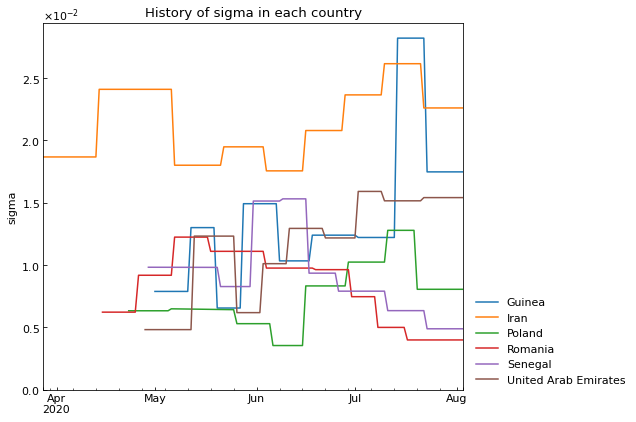

Country,Guinea,Iran,Poland,Romania,Senegal,United Arab Emirates
Date,,,,,,
2020-07-30,0.017479,0.022609,0.008057,0.003993,0.004888,0.015414
2020-07-31,0.017479,0.022609,0.008057,0.003993,0.004888,0.015414
2020-08-01,0.017479,0.022609,0.008057,0.003993,0.004888,0.015414
2020-08-02,0.017479,0.022609,0.008057,0.003993,0.004888,0.015414
2020-08-03,0.017479,0.022609,0.008057,0.003993,0.004888,0.015414


In [14]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

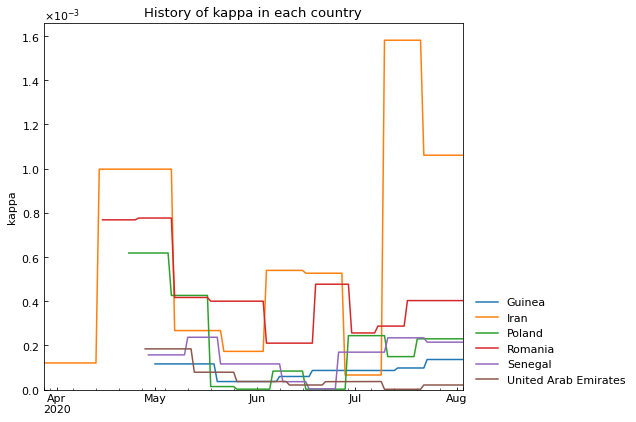

Country,Guinea,Iran,Poland,Romania,Senegal,United Arab Emirates
Date,,,,,,
2020-07-30,0.000137,0.00106,0.00023,0.000403,0.000215,0.000021
2020-07-31,0.000137,0.00106,0.00023,0.000403,0.000215,0.000021
2020-08-01,0.000137,0.00106,0.00023,0.000403,0.000215,0.000021
2020-08-02,0.000137,0.00106,0.00023,0.000403,0.000215,0.000021
2020-08-03,0.000137,0.00106,0.00023,0.000403,0.000215,0.000021


In [15]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

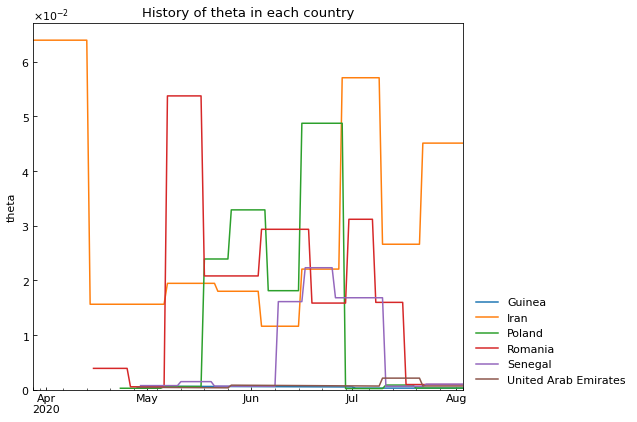

Country,Guinea,Iran,Poland,Romania,Senegal,United Arab Emirates
Date,,,,,,
2020-07-30,0.000281,0.0451,0.000301,0.000942,0.001014,0.000678
2020-07-31,0.000281,0.0451,0.000301,0.000942,0.001014,0.000678
2020-08-01,0.000281,0.0451,0.000301,0.000942,0.001014,0.000678
2020-08-02,0.000281,0.0451,0.000301,0.000942,0.001014,0.000678
2020-08-03,0.000281,0.0451,0.000301,0.000942,0.001014,0.000678


In [16]:
analyser.param_history("theta", roll_window=None).tail()